# Natural Language Processing: summarization, search, representation, and similarity

# Loading texts from the Internet

In [1]:
!pip install spacy --upgrade

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
import spacy
spacy.__version__

/usr/local/lib/python3.9/dist-packages/torch/cuda/__init__.py:497: UserWarning: Can't initialize NVML
  warnings.warn("Can't initialize NVML")


'3.5.1'

In [3]:
!python -m spacy download en_core_web_sm

/usr/local/lib/python3.9/dist-packages/torch/cuda/__init__.py:497: UserWarning: Can't initialize NVML
  warnings.warn("Can't initialize NVML")
2023-03-18 17:33:29.223388: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; dlerror: libnvinfer.so.7: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /usr/local/nvidia/lib:/usr/local/nvidia/lib64
2023-03-18 17:33:29.223496: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer_plugin.so.7'; dlerror: libnvinfer_plugin.so.7: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /usr/local/nvidia/lib:/usr/local/nvidia/lib64
2023-03-18 17:33:29.223523: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Cannot dlopen some TensorRT libraries. If you would like to use Nvidia GPU with TensorRT, please make sure the missing libraries mentione

In [4]:
import en_core_web_sm

In [5]:
!pip install goose3

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 88.2/88.2 KB 3.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 981.5/981.5 KB 21.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 103.2/103.2 KB 16.7 MB/s eta 0:00:00
  Created wheel for langdetect: filename=langdetect-1.0.9-py3-none-any.whl size=993243 sha256=c3a3dc255747aeffd0b51ba163724ce1fd2dff03e2f8455ff8b5b6fd3e7f27ff
  Stored in directory: /root/.cache/pip/wheels/d1/c1/d9/7e068de779d863bc8f8fc9467d85e25cfe47fa5051fff1a1bb
Successfully built langdetect


In [6]:
from goose3 import Goose
g = Goose()
url = 'https://en.wikipedia.org/wiki/Natural_language_processing'
article = g.extract(url)

In [7]:
article.title

'Natural language processing - Wikipedia'

In [10]:
article.cleaned_text[:10000]

'Natural language processing (NLP) is an interdisciplinary subfield of linguistics, computer science, and artificial intelligence concerned with the interactions between computers and human language, in particular how to program computers to process and analyze large amounts of natural language data. The goal is a computer capable of "understanding" the contents of documents, including the contextual nuances of the language within them. The technology can then accurately extract information and insights contained in the documents as well as categorize and organize the documents themselves.\n\nNatural language processing has its roots in the 1950s. Already in 1950, Alan Turing published an article titled "Computing Machinery and Intelligence" which proposed what is now called the Turing test as a criterion of intelligence, though at the time that was not articulated as a problem separate from artificial intelligence. The proposed test includes a task that involves the automated interpre

In [11]:
article.authors

[]

In [12]:
article.links[:10]

['/wiki/Language_processing_in_the_brain',
 '/wiki/File:Automated_online_assistant.png',
 '/wiki/File:Automated_online_assistant.png',
 '#cite_note-Kongthon-1',
 '/wiki/Automated_online_assistant',
 '/wiki/Customer_service',
 '/wiki/Interdisciplinary',
 '/wiki/Linguistics',
 '/wiki/Computer_science',
 '/wiki/Artificial_intelligence']

# Named entity recognition

In [13]:
nlp = spacy.load('en_core_web_sm')
nlp

In [14]:
document = nlp(article.cleaned_text)

In [15]:
# Tags: https://ashutoshtripathi.com/2020/04/13/parts-of-speech-tagging-and-dependency-parsing-using-spacy-nlp/
## checking the tokens and pos for the first ten tokens
for token in document[:10]:
  print(token.text, ' - ', token.pos_)


Natural  -  ADJ
language  -  NOUN
processing  -  NOUN
(  -  PUNCT
NLP  -  PROPN
)  -  PUNCT
is  -  AUX
an  -  DET
interdisciplinary  -  ADJ
subfield  -  NOUN


In [16]:
from spacy import displacy
displacy.render(document[:10], style = 'ent', jupyter=True)

In [17]:

for entity in document.ents:
  if entity.label_ == 'PERSON':
    print(entity.text)

Alan Turing
John Searle's
Joseph Weizenbaum
SAM
Wilensky
QUALM
Lehnert
Lehnert
Lesk
Centering
Jabberwacky
Chomskyan
Markov
George Lakoff
Lakoff


# Most frequent words

In [18]:
import nltk

In [19]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [20]:
tokens = nltk.tokenize.word_tokenize(article.cleaned_text)

In [21]:
print(document.ents[:10])
## creating a list for the entity label storing
labels_list = []
for i in range(0,10):
  labels_list.append(document.ents[i].label_)
print(labels_list)


(NLP, the 1950s, 1950, Alan Turing, "Computing Machinery and Intelligence, NLP, John Searle's, Chinese, Chinese, NLP)
['ORG', 'DATE', 'DATE', 'PERSON', 'WORK_OF_ART', 'ORG', 'PERSON', 'NORP', 'NORP', 'ORG']


In [22]:
print(tokens[:10])
print(document.ents[:10])
print(labels_list[:10])

['Natural', 'language', 'processing', '(', 'NLP', ')', 'is', 'an', 'interdisciplinary', 'subfield']
(NLP, the 1950s, 1950, Alan Turing, "Computing Machinery and Intelligence, NLP, John Searle's, Chinese, Chinese, NLP)
['ORG', 'DATE', 'DATE', 'PERSON', 'WORK_OF_ART', 'ORG', 'PERSON', 'NORP', 'NORP', 'ORG']


In [23]:
len(tokens),len(document.ents)

(2828, 150)

In [24]:
frequency = nltk.FreqDist(tokens)
most_common = frequency.most_common(10)
most_common

[(',', 179),
 ('the', 119),
 ('of', 111),
 ('.', 87),
 ('and', 50),
 ('in', 46),
 ('a', 46),
 ('to', 45),
 ('(', 43),
 (')', 43)]

# Word cloud

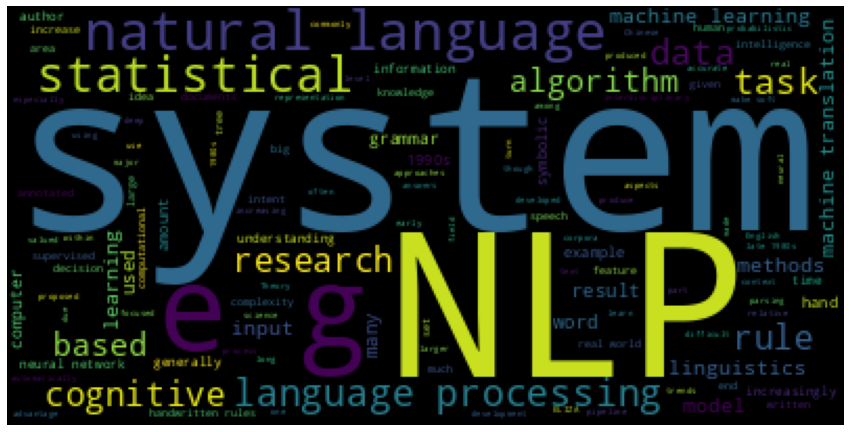

In [25]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
cloud = WordCloud()
cloud = cloud.generate(article.cleaned_text)
plt.figure(figsize=(15,15))
plt.imshow(cloud)
plt.axis('off');

# Preprocessing the texts (frequency and word cloud)

In [26]:
def preprocessing(sentence):
  # a A
  sentence = sentence.lower()
  sentence = sentence.replace('.', '')
  sentence = sentence.replace('[', '')
  tokens = []
  tokens = [token.text for token in nlp(sentence) if not (token.is_stop or token.like_num or token.is_punct or token.is_space or len(token) == 1)]
  tokens = ' '.join([element for element in tokens])

  return tokens

In [27]:
preprocessing('TesT natural language processing it the 1 10 50 ! . ,       1.  b ')

'test natural language processing'

In [28]:
article_cleaned = preprocessing(article.cleaned_text)
article_cleaned

'natural language processing nlp interdisciplinary subfield linguistics computer science artificial intelligence concerned interactions computers human language particular program computers process analyze large amounts natural language data goal computer capable understanding contents documents including contextual nuances language technology accurately extract information insights contained documents categorize organize documents natural language processing roots 1950s alan turing published article titled computing machinery intelligence proposed called turing test criterion intelligence time articulated problem separate artificial intelligence proposed test includes task involves automated interpretation generation natural language premise symbolic nlp summarized john searle chinese room experiment given collection rules eg chinese phrasebook questions matching answers computer emulates natural language understanding nlp tasks applying rules data confronts 1950s georgetown experimen

In [29]:
len(article.cleaned_text), len(article_cleaned)

(16084, 11251)

In [30]:
tokens = nltk.tokenize.word_tokenize(article_cleaned)
frequency = nltk.FreqDist(nltk.tokenize.word_tokenize(article_cleaned))
most_common = frequency.most_common(20)
most_common

[('language', 29),
 ('learning', 23),
 ('nlp', 22),
 ('eg', 22),
 ('machine', 22),
 ('natural', 20),
 ('systems', 20),
 ('rules', 16),
 ('statistical', 16),
 ('processing', 15),
 ('data', 15),
 ('research', 14),
 ('cognitive', 14),
 ('based', 13),
 ('input', 12),
 ('tasks', 11),
 ('translation', 11),
 ('methods', 11),
 ('models', 11),
 ('algorithms', 10)]

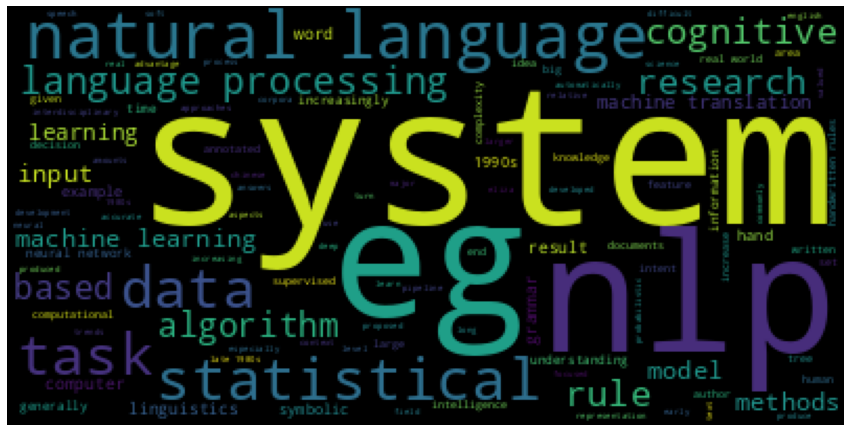

In [31]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
cloud = WordCloud()
cloud = cloud.generate(article_cleaned)
plt.figure(figsize=(15,15))
plt.imshow(cloud)
plt.axis('off');

# Text summarization

- sumy library: https://pypi.org/project/sumy/

In [32]:
article.cleaned_text

'Natural language processing (NLP) is an interdisciplinary subfield of linguistics, computer science, and artificial intelligence concerned with the interactions between computers and human language, in particular how to program computers to process and analyze large amounts of natural language data. The goal is a computer capable of "understanding" the contents of documents, including the contextual nuances of the language within them. The technology can then accurately extract information and insights contained in the documents as well as categorize and organize the documents themselves.\n\nNatural language processing has its roots in the 1950s. Already in 1950, Alan Turing published an article titled "Computing Machinery and Intelligence" which proposed what is now called the Turing test as a criterion of intelligence, though at the time that was not articulated as a problem separate from artificial intelligence. The proposed test includes a task that involves the automated interpre

In [33]:
original_sentences = [sentence for sentence in nltk.sent_tokenize(article.cleaned_text)]

In [34]:
original_sentences[:3]

['Natural language processing (NLP) is an interdisciplinary subfield of linguistics, computer science, and artificial intelligence concerned with the interactions between computers and human language, in particular how to program computers to process and analyze large amounts of natural language data.',
 'The goal is a computer capable of "understanding" the contents of documents, including the contextual nuances of the language within them.',
 'The technology can then accurately extract information and insights contained in the documents as well as categorize and organize the documents themselves.']

In [35]:
len(original_sentences), 40 / 87

(88, 0.45977011494252873)

In [36]:
!pip install sumy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 97.3/97.3 KB 4.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.1/10.1 MB 66.6 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Created wheel for breadability: filename=breadability-0.1.20-py2.py3-none-any.whl size=21708 sha256=8517e1ce661ab76a90262b6c97eda89f37df7a6d13434bd94a0809286aecb11a
  Stored in directory: /root/.cache/pip/wheels/ba/9f/70/7795228568b81b57a8932755938da9fb1f291b0576752604aa
  Created wheel for docopt: filename=docopt-0.6.2-py2.py3-none-any.whl size=13721 sha256=ecbf093535b7994606623b59099376429ae68f9d1b77742905f49ddac0a31630
  Stored in directory: /root/.cache/pip/wheels/70/4a/46/1309fc853b8d395e60bafaf1b6df7845bdd82c9

In [37]:
from sumy.parsers.plaintext import PlaintextParser
from sumy.nlp.tokenizers import Tokenizer
from sumy.summarizers.sum_basic import SumBasicSummarizer

In [38]:
parser = PlaintextParser.from_string(article.cleaned_text, Tokenizer('english'))

In [39]:
summarizer = SumBasicSummarizer()
summary = summarizer(parser.document, 40)

In [40]:
summary

(<Sentence: Already in 1950, Alan Turing published an article titled "Computing Machinery and Intelligence" which proposed what is now called the Turing test as a criterion of intelligence, though at the time that was not articulated as a problem separate from artificial intelligence.>,
 <Sentence: • 1950s: The Georgetown experiment in 1954 involved fully automatic translation of more than sixty Russian sentences into English.>,
 <Sentence: • 1960s: Some notably successful natural language processing systems developed in the 1960s were SHRDLU, a natural language system working in restricted "blocks worlds" with restricted vocabularies, and ELIZA, a simulation of a Rogerian psychotherapist, written by Joseph Weizenbaum between 1964 and 1966.>,
 <Sentence: Using almost no information about human thought or emotion, ELIZA sometimes provided a startlingly human-like interaction.>,
 <Sentence: When the "patient" exceeded the very small knowledge base, ELIZA might provide a generic response,

In [41]:
best_sentences = []
for sentence in summary:
  best_sentences.append(str(sentence))

In [42]:
best_sentences

['Already in 1950, Alan Turing published an article titled "Computing Machinery and Intelligence" which proposed what is now called the Turing test as a criterion of intelligence, though at the time that was not articulated as a problem separate from artificial intelligence.',
 '• 1950s: The Georgetown experiment in 1954 involved fully automatic translation of more than sixty Russian sentences into English.',
 '• 1960s: Some notably successful natural language processing systems developed in the 1960s were SHRDLU, a natural language system working in restricted "blocks worlds" with restricted vocabularies, and ELIZA, a simulation of a Rogerian psychotherapist, written by Joseph Weizenbaum between 1964 and 1966.',
 'Using almost no information about human thought or emotion, ELIZA sometimes provided a startlingly human-like interaction.',
 'When the "patient" exceeded the very small knowledge base, ELIZA might provide a generic response, for example, responding to "My head hurts" with "

In [43]:
from IPython.core.display import HTML
text = ''
display(HTML(f'<h2>Summary - {article.title}</h2>'))
for sentence in original_sentences:
  #print(sentence)
  if sentence in best_sentences:
    text += ' ' + str(sentence).replace(sentence, f"<mark>{sentence}</mark>")
  else:
    text += ' ' + sentence
display(HTML(f"""{text[:1000]}"""))

# Key word search

In [44]:
string = 'Natural language processing (NLP) is a subfield of linguistics, computer science, and artificial intelligence concerned with the interactions between computers and human language, in particular how to program computers to process and analyze large amounts of natural language data.'

In [45]:
search_strings = ['artificial', 'computer']
tokens_list = [nlp(item) for item in search_strings]

In [46]:
tokens_list

[artificial, computer]

In [47]:
from spacy.matcher import PhraseMatcher
matcher = PhraseMatcher(nlp.vocab)
matcher.add('SEARCH', None, *tokens_list)

In [48]:
document = nlp(string)
matches = matcher(document)
matches

[(8661325627334373315, 12, 13), (8661325627334373315, 16, 17)]

In [49]:
document[12:13], document[16:17]

(computer, artificial)

In [50]:
document[12-5:13+5]

a subfield of linguistics, computer science, and artificial intelligence

In [51]:
document[16-5:17+5]

, computer science, and artificial intelligence concerned with the interactions

In [52]:
number_of_words = 50
search_strings_html = ' '.join([element for element in search_strings])
search_strings_html

'artificial computer'

In [53]:
marked_text = ''
display(HTML(f'<h1>{search_strings_html.upper()}</h1>'))
document = nlp(article.cleaned_text)
matches = matcher(document)
#print(matches)
display(HTML(f"""<p><strong>Number of matches: </strong>{len(matches)}</p>"""))
for i in matches:
  #print(i)
  start = i[1] - number_of_words
  if start < 0:
    start = 0
  for j in range(len(tokens_list)):
    #print(j, tokens_list[j])
    if document[i[1]:i[2]].similarity(tokens_list[j]) == 1.0:
      search_text = str(tokens_list[j])
      marked_text += str(document[start:i[2] + number_of_words]).replace(search_text, f"<mark>{search_text}</mark>")
      marked_text += "<br /><br />"
display(HTML(f"""<blockquote>{marked_text}</blockquote>"""))

<ipython-input-53-4ef1bd3decee>:14: UserWarning: [W007] The model you're using has no word vectors loaded, so the result of the Span.similarity method will be based on the tagger, parser and NER, which may not give useful similarity judgements. This may happen if you're using one of the small models, e.g. `en_core_web_sm`, which don't ship with word vectors and only use context-sensitive tensors. You can always add your own word vectors, or use one of the larger models instead if available.
  if document[i[1]:i[2]].similarity(tokens_list[j]) == 1.0:


# Bag of words

In [54]:
from sklearn.feature_extraction.text import CountVectorizer
sentences = ['This is the first document.',
             'This document is the second document.',
             'And this is the third one.',
             'Is this the first document?']

In [55]:
sentences

['This is the first document.',
 'This document is the second document.',
 'And this is the third one.',
 'Is this the first document?']

In [56]:
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(sentences)
print(vectorizer.get_feature_names_out())

['and' 'document' 'first' 'is' 'one' 'second' 'the' 'third' 'this']


In [57]:
X.toarray()

array([[0, 1, 1, 1, 0, 0, 1, 0, 1],
       [0, 2, 0, 1, 0, 1, 1, 0, 1],
       [1, 0, 0, 1, 1, 0, 1, 1, 1],
       [0, 1, 1, 1, 0, 0, 1, 0, 1]])

In [58]:
original_sentences[:3]

['Natural language processing (NLP) is an interdisciplinary subfield of linguistics, computer science, and artificial intelligence concerned with the interactions between computers and human language, in particular how to program computers to process and analyze large amounts of natural language data.',
 'The goal is a computer capable of "understanding" the contents of documents, including the contextual nuances of the language within them.',
 'The technology can then accurately extract information and insights contained in the documents as well as categorize and organize the documents themselves.']

In [59]:
vectorizer = CountVectorizer()
X_sentences = vectorizer.fit_transform(original_sentences)
print(vectorizer.get_feature_names_out())

['10' '100' '11' '12' '13' '14' '15' '16' '17' '18' '19' '1950' '1950s'
 '1954' '1960s' '1964' '1966' '1970s' '1975' '1976' '1977' '1978' '1979'
 '1980s' '1981' '1990s' '1999' '20' '2000s' '2002' '2003' '2006' '2007'
 '2009' '2010s' '2012' '2015' '2017' '2018' '2020' '40' '41' '42' '43'
 '44' '45' '46' '47' '48' '49' '50' '51' '52' '60' 'abandoned' 'able'
 'about' 'above' 'accidentally' 'accurate' 'accurately' 'achieve' 'acl'
 'acquiring' 'act' 'action' 'additional' 'addressed' 'advanced'
 'advantage' 'advantages' 'after' 'age' 'ai' 'aid' 'alan' 'algorithm'
 'algorithms' 'alignment' 'alike' 'all' 'almost' 'along' 'alpac' 'already'
 'also' 'although' 'ambiguous' 'america' 'among' 'amount' 'amounts' 'an'
 'analysis' 'analyze' 'analyzed' 'and' 'annotated' 'annotation'
 'annotations' 'another' 'answering' 'answers' 'apertium' 'apparent'
 'applications' 'applied' 'apply' 'applying' 'approach' 'approaches'
 'arabic' 'are' 'area' 'areas' 'art' 'article' 'articulated' 'artificial'
 'as' 'aspec

In [60]:
len(vectorizer.get_feature_names_out())

865

In [64]:
# X_sentences.toarray()

In [63]:
# X_sentences.toarray()[1]

# TF-IDF

In [65]:
sentences = ['This is the first document.',
             'This document is the second document.',
             'And this is the third one.',
             'Is this the first document?']

In [66]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(sentences)
print(vectorizer.get_feature_names_out())

['and' 'document' 'first' 'is' 'one' 'second' 'the' 'third' 'this']


In [67]:
vectorizer.idf_

array([1.91629073, 1.22314355, 1.51082562, 1.        , 1.91629073,
       1.91629073, 1.        , 1.91629073, 1.        ])

In [68]:
# X.toarray()

In [69]:
original_sentences[:3]

['Natural language processing (NLP) is an interdisciplinary subfield of linguistics, computer science, and artificial intelligence concerned with the interactions between computers and human language, in particular how to program computers to process and analyze large amounts of natural language data.',
 'The goal is a computer capable of "understanding" the contents of documents, including the contextual nuances of the language within them.',
 'The technology can then accurately extract information and insights contained in the documents as well as categorize and organize the documents themselves.']

In [70]:
vectorizer = TfidfVectorizer()
X_sentences = vectorizer.fit_transform(original_sentences)

In [71]:
# print(vectorizer.get_feature_names_out())

In [72]:
len(vectorizer.get_feature_names_out())

865

In [73]:
# X_sentences.toarray()

In [74]:
# X_sentences.toarray()[1]

# Cosine similarity

- Link: https://en.wikipedia.org/wiki/Cosine_similarity
- Step by step calculation: https://janav.wordpress.com/2013/10/27/tf-idf-and-cosine-similarity/

In [75]:
X_sentences.shape

(88, 865)

In [76]:
type(X_sentences)

scipy.sparse._csr.csr_matrix

In [77]:
X_test_similarity = X_sentences[0:3]
X_test_similarity = X_test_similarity.toarray()

In [78]:
type(X_test_similarity)

numpy.ndarray

In [79]:
import numpy as np
X_test_similarity = np.concatenate((X_test_similarity, X_test_similarity[0].reshape(1,-1)), axis = 0)

In [80]:
X_test_similarity

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [81]:
X_test_similarity.shape

(4, 865)

In [82]:
from sklearn.metrics.pairwise import cosine_similarity

In [83]:
cosine_similarity(X_test_similarity[0].reshape(1,-1), X_test_similarity[1].reshape(1,-1))

array([[0.13247368]])

In [84]:
original_sentences[0]

'Natural language processing (NLP) is an interdisciplinary subfield of linguistics, computer science, and artificial intelligence concerned with the interactions between computers and human language, in particular how to program computers to process and analyze large amounts of natural language data.'

In [85]:
original_sentences[1]

'The goal is a computer capable of "understanding" the contents of documents, including the contextual nuances of the language within them.'

In [86]:
cosine_similarity(X_test_similarity[1].reshape(1,-1), X_test_similarity[2].reshape(1,-1))

array([[0.16960045]])

In [87]:
original_sentences[2]

'The technology can then accurately extract information and insights contained in the documents as well as categorize and organize the documents themselves.'

In [88]:
cosine_similarity(X_test_similarity[0].reshape(1,-1), X_test_similarity[3].reshape(1,-1))

array([[1.]])

In [89]:
cosine_similarity(X_test_similarity[0].reshape(1,-1), X_test_similarity)

array([[1.        , 0.13247368, 0.05834062, 1.        ]])

# Simulating a chatbot

In [90]:
welcome_words_input = ('hey', 'hello', 'hi')
welcome_words_ouput = ('hey', 'hello', 'hi', 'how are you?', 'welcome', 'how are you doing?')

In [91]:
'how are you'.split()

['how', 'are', 'you']

In [92]:
import random
def welcome_message(text):
  for word in text.split():
    if word.lower() in welcome_words_input:
      return random.choice(welcome_words_ouput)

In [93]:
welcome_message('hi')

'welcome'

In [94]:
welcome_message('hiii')

In [95]:
def answer(user_text, threshold = 0.3):
  cleaned_sentences = []
  for sentence in original_sentences:
    cleaned_sentences.append(preprocessing(sentence))
  #print(cleaned_sentences)

  chatbot_answer = ''
  user_text = preprocessing(user_text)
  #print(user_text)
  cleaned_sentences.append(user_text)
  #print(cleaned_sentences[-1])

  tfidf = TfidfVectorizer()
  X_sentences = tfidf.fit_transform(cleaned_sentences)
  #print(X_sentences.toarray()[-1])
  similarity = cosine_similarity(X_sentences[-1], X_sentences)
  #print(similarity)
  sentence_index = similarity.argsort()[0][-2]
  #print(sentence_index)
  #print(similarity[0][sentence_index])

  if similarity[0][sentence_index] < threshold:
    chatbot_answer += 'Sorry, no answer was found!'
  else:
    chatbot_answer += original_sentences[sentence_index]

  return chatbot_answer  

In [96]:
answer('What is natural language processing?', 0.3)

'Natural language processing has its roots in the 1950s.'

In [97]:
answer('Who is Alan Turing')

'Already in 1950, Alan Turing published an article titled "Computing Machinery and Intelligence" which proposed what is now called the Turing test as a criterion of intelligence, though at the time that was not articulated as a problem separate from artificial intelligence.'

In [98]:
answer('What is NLP')

'[51] Likewise, ideas of cognitive NLP are inherent to neural models multimodal NLP (although rarely made explicit).'

In [99]:
cont = True
print('Hello! I am a chatbot and I will answer your questions about natural language processing')
while cont == True:
  user_text = input()
  if user_text != 'quit':
    if welcome_message(user_text) != None:
      print('Chatbot: ' + welcome_message(user_text))
    else:
      print('Chatbot:')
      print(answer(user_text))  
  else:
    cont = False
    print('Chatbot: Bye! I will see you soon')

Hello! I am a chatbot and I will answer your questions about natural language processing
Hi
Chatbot: hi
Natural Language Processing
Chatbot:
Natural language processing has its roots in the 1950s.
quit
Chatbot: Bye! I will see you soon
